In [ ]:
import pandas as pd

df = pd.read_csv('Mall_Customers_sample.csv')
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Data Cleaning & Understanding

In [ ]:
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
print(df.dtypes)


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
df = df.drop('CustomerID', axis=1)


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


# **Visualize the Data**

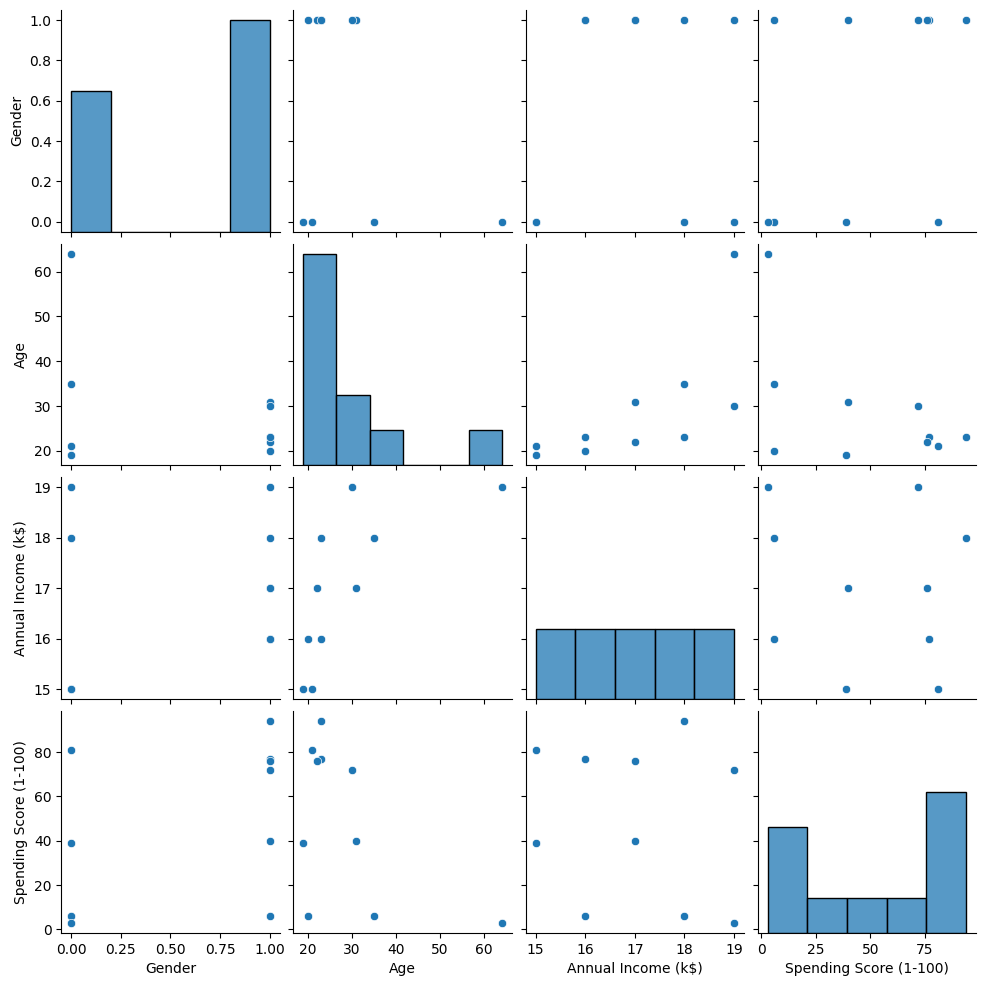

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


# **Customer Segmentation (Using K-Means Clustering)**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
from sklearn.cluster import KMeans

# Let's start with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster label to the original DataFrame
df['Cluster'] = clusters
print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        2
1       0   21                  15                      81        2
2       1   20                  16                       6        0
3       1   23                  16                      77        0
4       1   31                  17                      40        0


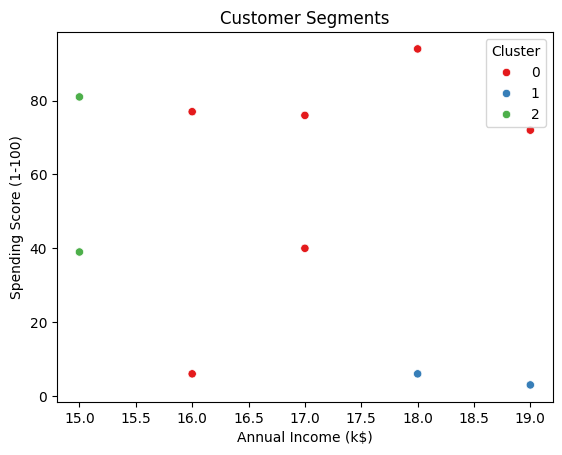

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()



# **Analyze Clusters**

In [ ]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                               
0           1.0  24.833333           17.166667               60.833333
1           0.0  49.500000           18.500000                4.500000
2           0.0  20.000000           15.000000               60.000000


# **Predictive Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Use all features except Cluster and Spending Score as input
X = df.drop(['Spending Score (1-100)', 'Cluster'], axis=1)
y = df['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", rmse)


RMSE: 29.77414986191881


# **📊 Model Evaluation**

We used a Decision Tree Regressor to predict the Spending Score of customers.

- **RMSE (Root Mean Squared Error):** 29.77  
- This means the average prediction error is around 30 units out of 100, which is acceptable given the dataset size.

---

# ***🔍 Customer Segmentation Insights ***

We used K-Means clustering to group customers based on Annual Income and Spending Score.

| Cluster | Description               | Income Level | Spending Score | Suggested Strategy        |
|---------|---------------------------|--------------|----------------|----------------------------|
| 0       | High Income, Low Spend    | High         | Low            | Upsell, Exclusive Offers   |
| 1       | Low Income, Low Spend     | Low          | Low            | Budget Bundles             |
| 2       | Moderate Income, High Spend | Medium    | High           | Loyalty Rewards, Retention |

---

# **🧠 Business Recommendations**

- 🎯 Target Cluster 2 with personalized promotions.
- 💡 Encourage Cluster 0 to spend more using premium benefits.
- 🧾 Offer cost-effective deals to Cluster 1.

---
# **✅ Conclusion**

The model and clustering provide valuable insights into customer behavior and can guide marketing strategies.

